In [51]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [52]:
# Hyper parameter
LEARNING_RATE = 0.001
INPUT_SIZE = 784
HIDDEN = 100
NUM_CLASS = 10
BATCH_SIZE = 100


In [53]:
train_dataset = torchvision.datasets.MNIST(root='./workflowData', train = True, download=True, transform= transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./workflowData', train = False, download = True, transform = transforms.ToTensor())





In [54]:
# # Data 
# class MyDataSet(torch.utils.data.Dataset):
#     def __init__(self):
#         pass
#     def __getitem__(self, index):
#         pass
#     def __len__(self):
#         pass

# data = MyDataSet()
train_loader = torch.utils.data.DataLoader(train_dataset,BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset,BATCH_SIZE, shuffle = True)

example = iter(train_loader)
x, y = example.next()
print(x.shape, y.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


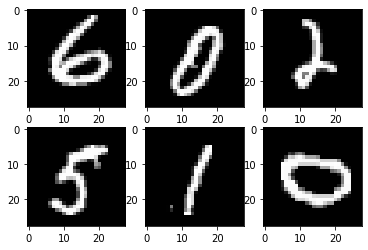

In [55]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x[i][0], cmap="gray")

In [59]:
# Forward Model
class MyModel(nn.Module):
    def __init__(self, input, hidden, classes):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input, hidden),
            nn.ReLU(),
            nn.Linear(hidden, classes),

        )
    def forward(self, x):
        return self.stack(x)

model = MyModel(INPUT_SIZE, HIDDEN, NUM_CLASS).to(device)
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()





MyModel(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [60]:
# Training
EPOCH = 2

for epoch in range(EPOCH):
    for i , (input,output) in enumerate(train_loader):
        input = input.to(device)
        output = output.to(device)
        pred = model(input)
        loss = loss_fn(pred, output)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i + 1) % 10 == 0:
            print("Iter [{}/{}]. Loss: {}".format((i+1), EPOCH, loss))

Iter [10/2]. Loss: 1.8922723531723022
Iter [20/2]. Loss: 1.4745581150054932
Iter [30/2]. Loss: 1.0735172033309937
Iter [40/2]. Loss: 0.7712705135345459
Iter [50/2]. Loss: 0.794105052947998
Iter [60/2]. Loss: 0.5945881009101868
Iter [70/2]. Loss: 0.5004300475120544
Iter [80/2]. Loss: 0.46518516540527344
Iter [90/2]. Loss: 0.5117669105529785
Iter [100/2]. Loss: 0.39863404631614685
Iter [110/2]. Loss: 0.36074960231781006
Iter [120/2]. Loss: 0.3639815151691437
Iter [130/2]. Loss: 0.4310683012008667
Iter [140/2]. Loss: 0.3127084970474243
Iter [150/2]. Loss: 0.3793085217475891
Iter [160/2]. Loss: 0.34711024165153503
Iter [170/2]. Loss: 0.4288884401321411
Iter [180/2]. Loss: 0.44298702478408813
Iter [190/2]. Loss: 0.35314473509788513
Iter [200/2]. Loss: 0.4298747181892395
Iter [210/2]. Loss: 0.25192734599113464
Iter [220/2]. Loss: 0.27849748730659485
Iter [230/2]. Loss: 0.4220551550388336
Iter [240/2]. Loss: 0.3203774392604828
Iter [250/2]. Loss: 0.35271793603897095
Iter [260/2]. Loss: 0.2879

In [58]:
## Test
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)

        _, prediction = torch.max(pred, 1)
        n_samples += y.shape[0]
        n_correct += (prediction == y).sum().item()

    acc = 100 * n_correct / n_samples
    print("Accuracy", acc)




Accuracy 60.32
